In [1]:
import  numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
%matplotlib inline

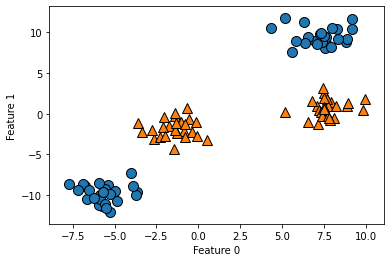

In [3]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4,random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

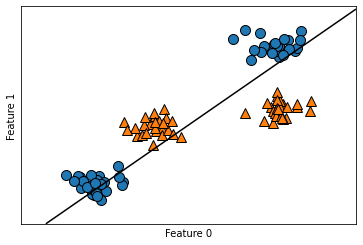

In [4]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0.5, 0, 'Feature 1 ** 2')

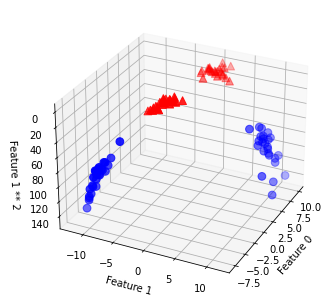

In [7]:
# add the squared first feature
X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()
# visualize in 3D 
ax=Axes3D(figure, elev=-152,azim=-26)
# plot first all the points with y==0, then all with y==1
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

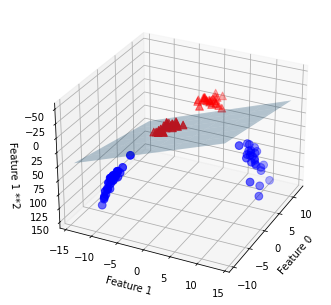

In [8]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

# show linear decision boundary
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
mask=y==0
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 **2")
plt.show()

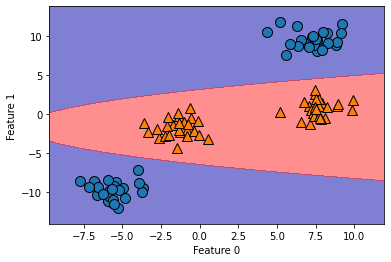

In [9]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

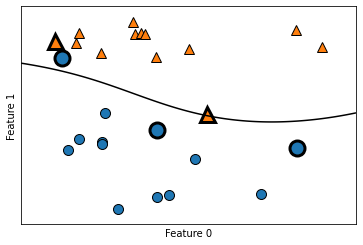

In [10]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# plot support vectors
sv=svm.support_vectors_
# class labels of support vectors  are given by the sign of dual coefficients
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

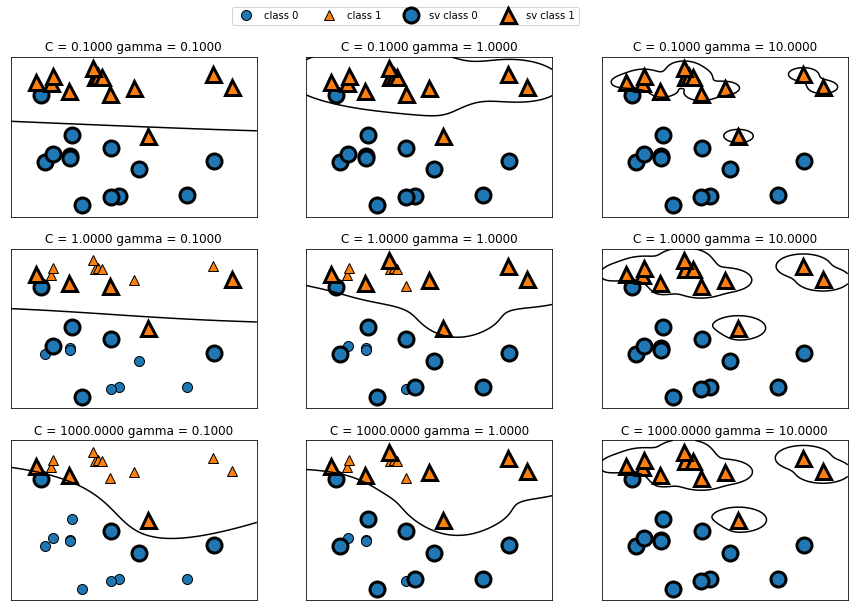

In [11]:
fig,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)


axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],ncol=4,loc=(.9,1.2))

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train,y_train)

print("Training Accuracy: {:.3f}".format(svc.score(X_train,y_train)))
print("Testing Accuracy: {:.3f}".format(svc.score(X_test,y_test)))

Training Accuracy: 0.904
Testing Accuracy: 0.937


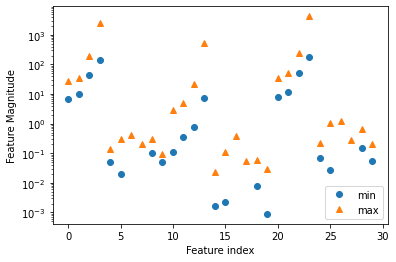

In [17]:
plt.plot(X_train.min(axis=0),'o',label='min',lw=0)
plt.plot(X_train.max(axis=0),'^',label='max',lw=0)
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature Magnitude")
plt.yscale("log")
plt.show()

In [19]:
# compute the minimum value per feature on the training set
min_on_training=X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)

X_train_scaled=(X_train-min_on_training)/ range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [20]:
X_test_scaled=(X_test-min_on_training)/range_on_training

In [21]:
svc=SVC()
svc.fit(X_train_scaled,y_train)

print("Training Accuracy: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Testing Accuracy: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Training Accuracy: 0.984
Testing Accuracy: 0.972


In [24]:
svc=SVC(kernel='rbf',C=1000,gamma=0.01)
svc.fit(X_train_scaled,y_train)

print("Training Accuracy: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Testing Accuracy: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Training Accuracy: 0.986
Testing Accuracy: 0.979
